## Importamos librerías

In [1]:
from keras.datasets import imdb
from keras import models, layers, optimizers
import numpy as np


## Descargamos los datos de imdb - Keras

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

## Función de one-hot encoding

In [3]:
def vectorizar(sequences, dim=10000):
    restults = np.zeros((len(sequences),dim))
    for i, sequences in enumerate(sequences):
        restults[i,sequences]=1
    return restults 

## Transformamos datos

In [4]:
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

In [5]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Red neuronal original

In [6]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [7]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['acc'])

In [8]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train =  y_train[10000:]

## Entrenando

In [9]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 27ms/step - loss: 0.5513 - acc: 0.7641 - val_loss: 0.4155 - val_acc: 0.8652
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3343 - acc: 0.8963 - val_loss: 0.3234 - val_acc: 0.8831
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2390 - acc: 0.9243 - val_loss: 0.2819 - val_acc: 0.8908
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1849 - acc: 0.9403 - val_loss: 0.2820 - val_acc: 0.8865
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1516 - acc: 0.9515 - val_loss: 0.2815 - val_acc: 0.8895
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1249 - acc: 0.9610 - val_loss: 0.3007 - val_acc: 0.8830
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1043 - acc: 0.9681 - val_loss: 0.3063 - val_acc: 0.8855
Epoch 8/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0872 - a

### Comparando un modelo más pequeño

In [10]:
model2 = models.Sequential()
model2.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(4, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

In [11]:
model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['acc'])

In [12]:
history2 = model2.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 29ms/step - loss: 0.6335 - acc: 0.6506 - val_loss: 0.5855 - val_acc: 0.7323
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.5521 - acc: 0.7749 - val_loss: 0.5399 - val_acc: 0.8273
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.5037 - acc: 0.8366 - val_loss: 0.5077 - val_acc: 0.8332
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.4678 - acc: 0.8732 - val_loss: 0.4868 - val_acc: 0.8572
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.4396 - acc: 0.8949 - val_loss: 0.4737 - val_acc: 0.8523
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.4164 - acc: 0.9119 - val_loss: 0.4628 - val_acc: 0.8630
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3961 - acc: 0.9269 - val_loss: 0.4535 - val_acc: 0.8758
Epoch 8/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3782 - a

## Analizamos resultados

In [ ]:
import matplotlib.pyplot as plt 

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

val_loss_values2 = history2.history['val_loss']


fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,val_loss_values2, 'o',label='smaller')
plt.plot(epoch,val_loss_values, '--',label='original')
plt.legend()
plt.show()

## Regularización

In [14]:
from keras import regularizers

In [15]:
model3 = models.Sequential()
model3.add(layers.Dense(16, activation='relu', input_shape=(10000,),kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dense(16, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dense(1, activation='sigmoid'))

In [16]:
model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['acc'])

In [17]:
history3 = model3.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 25ms/step - loss: 0.5485 - acc: 0.8009 - val_loss: 0.4287 - val_acc: 0.8718
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3596 - acc: 0.9015 - val_loss: 0.3595 - val_acc: 0.8837
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2948 - acc: 0.9181 - val_loss: 0.3510 - val_acc: 0.8804
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2596 - acc: 0.9327 - val_loss: 0.3308 - val_acc: 0.8880
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2357 - acc: 0.9426 - val_loss: 0.3659 - val_acc: 0.8748
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2223 - acc: 0.9464 - val_loss: 0.3397 - val_acc: 0.8848
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2116 - acc: 0.9491 - val_loss: 0.3440 - val_acc: 0.8840
Epoch 8/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1998 - a

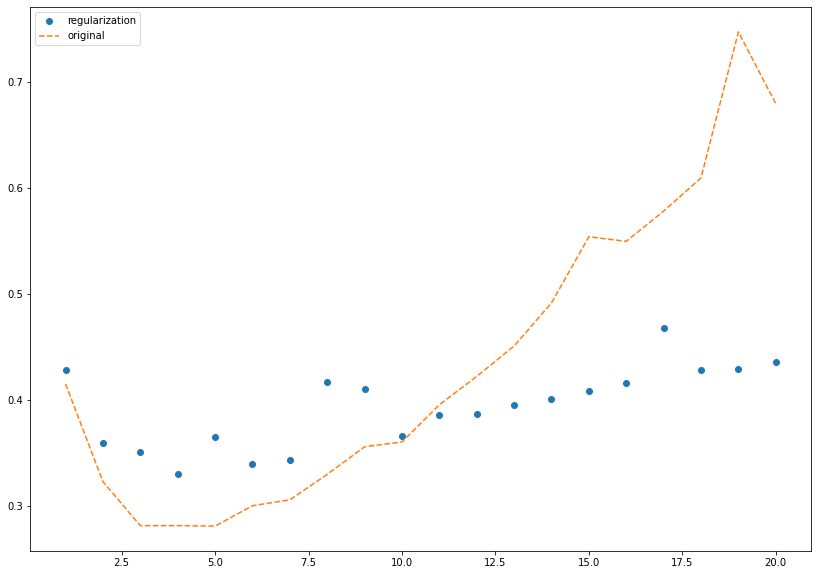

In [18]:
import matplotlib.pyplot as plt 

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

val_loss_values3 = history3.history['val_loss']


fig = plt.figure(figsize=(14,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,val_loss_values3, 'o',label='regularization')
plt.plot(epoch,val_loss_values, '--',label='original')
plt.legend()
plt.show()

### Dropout

In [19]:
model4 = models.Sequential()
model4.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(16, activation='relu'))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(1, activation='sigmoid'))

In [20]:
model4.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['acc'])

In [21]:
history4 = model4.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 22ms/step - loss: 0.6319 - acc: 0.6475 - val_loss: 0.5234 - val_acc: 0.8477
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.5133 - acc: 0.7767 - val_loss: 0.4199 - val_acc: 0.8691
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.4328 - acc: 0.8219 - val_loss: 0.3861 - val_acc: 0.8547
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3720 - acc: 0.8605 - val_loss: 0.3135 - val_acc: 0.8830
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3221 - acc: 0.8802 - val_loss: 0.3025 - val_acc: 0.8775
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2862 - acc: 0.9010 - val_loss: 0.2808 - val_acc: 0.8903
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2531 - acc: 0.9123 - val_loss: 0.2938 - val_acc: 0.8894
Epoch 8/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2289 - a

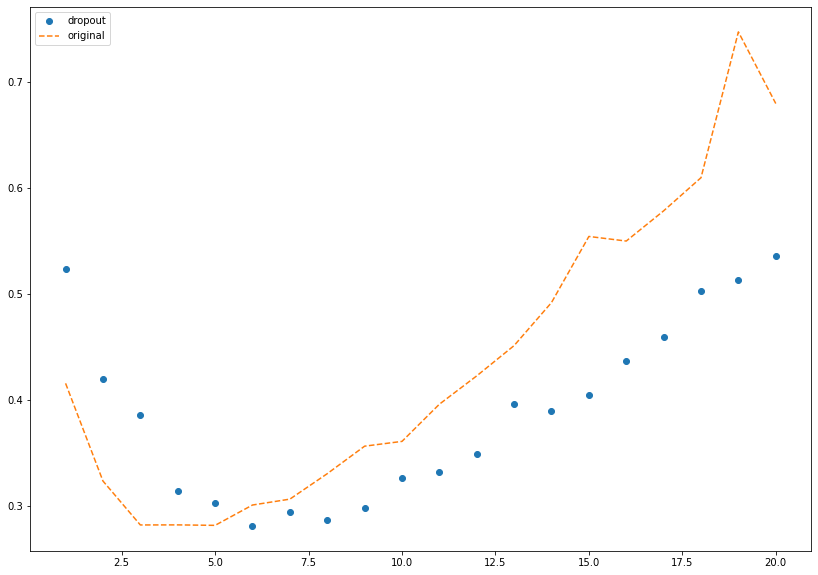

In [22]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

val_loss_values4 = history4.history['val_loss']


fig = plt.figure(figsize=(14,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,val_loss_values4, 'o',label='dropout')
plt.plot(epoch,val_loss_values, '--',label='original')
plt.legend()
plt.show()